## Day 5 working lunch exercise


You have 2 hours to complete this excercise. You may work together but each student should turn in their own copy of the exercise. We will grade on effort so please do your best to answer all the questions and work together!

Create a Python notebook to run and document your analysis. You can start with this notebook, or from another existing notebook. When finished, export the notebook and submit it to Blackboard.

1. The half-life of P-32 radioactive isotope is 14.32 days. If you receive a vial of P32 containing 1000 atoms, how many atoms do you have left after 7 days? Plot the radioactive decay function and calculate number of remaining atoms at 7 days. 

In [1]:
##to get you started
from scipy.integrate import solve_ivp
import math
import matplotlib.pyplot as plot

##using the half-life given to calculate the rate of decay
k = math.log(2)/14.2
k 

0.048813181729573614

In [2]:
def decay(t, atoms):
    k=math.log(2)/14.32
    rate=-k*atoms
    return rate

In [3]:
atoms_0=[1000]
tspan=[0,7]

In [8]:
C_solver=solve_ivp(decay, tspan, atoms_0,max_step=.001)

In [9]:
C_solver

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 42002
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([0.000e+00, 1.000e-03, 2.000e-03, ..., 6.998e+00, 6.999e+00,
       7.000e+00])
 t_events: None
        y: array([[1000.        ,  999.95159704,  999.90319642, ...,  712.6733339 ,
         712.6388384 ,  712.60434457]])
 y_events: None

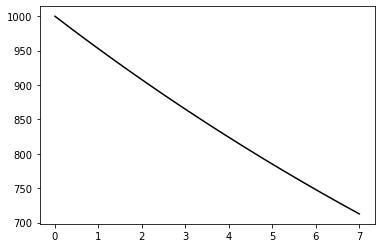

In [10]:
plot.plot(C_solver.t, C_solver.y[0], 'k-')

In [7]:
C_solver.y

array([[1000.        ,  991.16957824,  907.04242881,  712.60440268]])

Answer:

2. Say you have 100 bacteria in an essentially infinite amount of growth media.  Solve the ODE for exponential growth, assuming that the rate of growth of bacteria is given by:

    Growth rate $= dB$ where $d$ is a rate constant and $B$ the number of bacteria. Solve for $d$ of 1.39, .693 and .347.  (Hint: Use `args` in `solve_ivp` to make your life easier)

    What is the doubling time of bacteria for each of these? To get this you can A) use the plot to estimate B) use the `events` argument to get the solver to give you the answer for the first doubling.

In [ ]:
Answer:`b

In [12]:
def growth(t, B, d):
    #Calculate the rate as d times B (B is number of bacteria)
    return d*B

In [13]:
def doubletime(t, B, d):
    #Return when bacteria had doubled - or when bacteria minus 200 is 0
    return B[0]-200

In [16]:
import numpy as np

In [20]:
tspan=[0, 20]
t=np.linspace(0,20, 210)
b0=[100]
k=[1.39, 0.693, 0.347]
colors=['b-', 'r-', 'g-']

[array([0.49871087])]
[array([1.00021599])]
[array([1.99733947])]


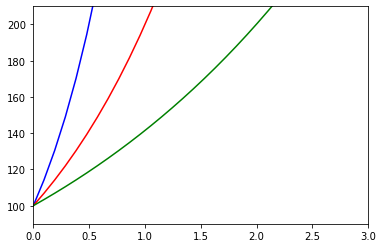

In [22]:
for i in range(0,3):
    b_solver=solve_ivp(growth, tspan, b0, args=[k[i]], t_eval=t, events=doubletime)
    plot.plot(b_solver.t, b_solver.y[0], colors[i])
    print(b_solver.t_events)
    plot.xlim(0,3)
    plot.ylim(90,210)